In [91]:
import pandas as pd
import matplotlib.pyplot as pp
import seaborn as sns



In [92]:
import numpy as np
from collections import Counter


In [93]:
df = pd.read_csv('data/OsmoticStress_with_binary_positions_padded_5000.csv')
original_df = pd.read_csv('data/OsmoticStress_with_binary_positions.csv')
original_excel = pd.read_excel('data/OsmoticStress.xlsx')
df
original_excel.shape


(32709, 12)

In [94]:

from Bio import SeqIO

def read_fasta_to_dict(file_path):
    sequences = {}
    for record in SeqIO.parse(file_path, "fasta"):
        uniprot_id = record.id.split('|')[1]
        sequences[uniprot_id] = str(record.seq)
    return sequences

fasta_file_path = 'data/UP000002311_559292.fasta'
sequences = read_fasta_to_dict(fasta_file_path)

original_excel["full_sequence"] = original_excel['Uniprot_ID'].map(sequences)
original_excel.shape


(32709, 13)

In [95]:
import dash_bio


In [99]:
original_excel
indexs = df.sort_values(by=['index'],ascending=False)
print(original_excel.shape)

trimmed_original = original_excel.drop(indexs['index'] , axis=0)
print(trimmed_original.shape)
indexs

(32709, 13)
(27709, 13)


,index,Uniprot_ID,Peptide_sequence,Log2FC(LiP_norm),Qvalue(LiP),full_sequence,Binary_Positions,Padded_Binary_Positions
4988,28795,P47137,AMQEAVDEGLVK,0.668768,0.051166,MVPKFYKLSNGFKIPSIALGTYDIPRSQTAEIVYEGVKCGYRHFDT...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4987,28793,P34240,SEGECCDLNK,-1.344848,0.051166,MEKIPRWLLFSLISSVLCILGALCVPLLSVAFDSKRNSQSKLVNYG...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4964,28787,P33441,LTEQNISQLK,-0.405096,0.051150,MPLSQKQIDQVRTKVHYSEVDTPFNKYLDILGKVTKLTGSIINGTL...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4959,28778,P80428,STSPAANSADTPNETGK,-0.460078,0.051109,MSNAALQVYGGDEVSAVVIDPGSYTTNIGYSGSDFPQSILPSVYGK...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4957,28776,P36000,TGLVSQYPQTR,0.175883,0.051109,MPPLDKRIKKFLKDSIRIAPKISGKGELSELRTGLVSQYPQTRKDA...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...
4475,4,P15703,SVVADISDSDGK,-0.434615,0.048552,MRFSTTLATAATALFFTASQVSAIGELAFNLGVKNNDGTCKSTSDY...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3064,3,P15703,EAFDEDWKPNTSGTSDVEK,0.348193,0.042584,MRFSTTLATAATALFFTASQVSAIGELAFNLGVKNNDGTCKSTSDY...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2263,2,P15703,NDLTASQLSDK,-0.498240,0.039093,MRFSTTLATAATALFFTASQVSAIGELAFNLGVKNNDGTCKSTSDY...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1517,1,P15703,SYTSTVK,0.285029,0.034862,MRFSTTLATAATALFFTASQVSAIGELAFNLGVKNNDGTCKSTSDY...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [100]:
#original_excel = pd.read_excel('data/OsmoticStress.xlsx')
original_excel["full_sequence"] = original_excel["full_sequence"].astype(str)

trimmed_original = original_excel[original_excel['full_sequence'].apply(lambda x: len(x)) < 1000]
trimmed_original = trimmed_original.sort_values(by=['Qvalue(LiP)'],ascending=True)
print(trimmed_original.shape)
trimmed_original = trimmed_original.iloc[5000:,:]
trimmed_original

(28008, 13)


,Uniprot_ID,Gene_name,Systematic_gene_name,Protein_Description,Peptide_sequence,Log2FC(LiP_raw),Log2FC(LiP_norm),Pvalue(LiP),Qvalue(LiP),Log2FC(P.Abundance),Pvalue(P.Abundance),Qvalue(P.Abundance),full_sequence
20674,Q12447,PAA1,YDR071C,Polyamine N-acetyltransferase 1,IVLIAHEPLIPFYER,1.382345,1.382345,0.022927,0.051228,-0.019636,0.287452,0.241893,MASSSSTLPLHMYIRPLIIEDLKQILNLESQGFPPNERASEEIISF...
11192,P04147,PAB1,YER165W,Polyadenylate-binding protein cytoplasmic and ...,NQQIVAGKPLYVA,0.168464,0.168464,0.022942,0.051243,-0.021307,0.046841,0.100200,MADITDKTAEQLENLNIQDDQKQAATGSESQSVENSSASLYVGDLE...
28802,P53144,YGL101W,YGL101W,HD domain-containing protein YGL101W,YLCESIIRPCSESASR,0.576739,0.576739,0.022942,0.051243,0.239039,0.210013,0.202234,MTAVNIWKPEDNIPREILAILSKPHPNYQLAFLNIIQLLKTQRRTG...
15040,Q06440,CRN1,YLR429W,Coronin-like protein,LATTGFSK,0.256791,0.256791,0.022984,0.051317,0.029457,0.510845,0.334774,MSGKFVRASKYRHVFGQAAKKELQYEKLKVTNNAWDSNLLKTNGKF...
4041,P53278,YGR130C,YGR130C,Uncharacterized protein YGR130C,SEIDDLNNEK,-0.536790,-0.536790,0.022997,0.051338,0.014028,0.153595,0.174477,MLFNINRQEDDPFTQLINQSSANTQNQQAHQQESPYQFLQKVVSNE...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20655,P53920,NMA111,YNL123W,Pro-apoptotic serine protease NMA111,YDPELVK,-0.000069,-0.000069,0.999374,0.389420,0.083157,0.024680,0.073888,MTISLSNIKKRDHSKISDGTSGESSLVKRKQLESATGDQEEEYTDH...
22774,Q01080,RPA49,YNL248C,DNA-directed RNA polymerase I subunit RPA49,APSDTTFDLYKK,0.020517,0.020517,0.999551,0.389465,-0.134792,0.463403,0.317352,MSVKRSVSEIEIESVQDQPSVAVGSFFKGFRAPSDTTFDLYKKKKS...
7575,P08524,ERG20,YJL167W,Farnesyl pyrophosphate synthase,KIFNDLK,-0.101229,-0.101229,0.999673,0.389500,-0.216520,0.505662,0.333047,MASEKEIRRERFLNVFPKLVEELNASLLAYGMPKEACDWYAHSLNY...
19419,P34909,MOT2,YER068W,General negative regulator of transcription su...,SNIIDEETYK,-0.000914,-0.000914,0.999952,0.389597,0.200652,0.128561,0.160267,MMNPHVQENLQAIHNALSNFDTSFLSEDEEDYCPLCIEPMDITDKN...


(23008, 13)
(5000, 8)


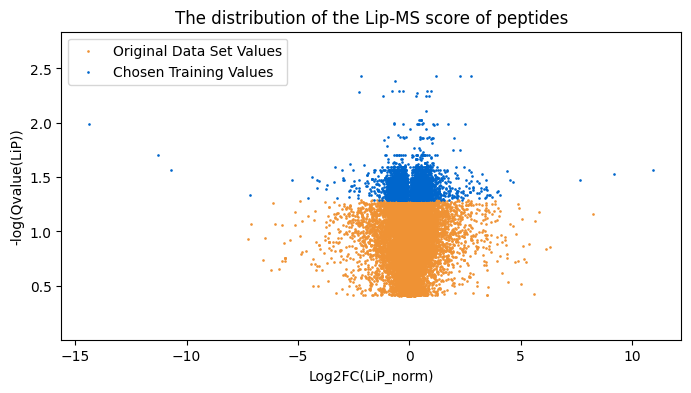

'./data/training-data-distribution.pdf'

In [102]:
from matplotlib.backends.backend_pdf import PdfPages


relevant = df[["Qvalue(LiP)","Log2FC(LiP_norm)"]]
print(trimmed_original.shape)
print(df.shape)


fig = pp.figure(figsize=(8, 4))
pp.tight_layout()
pp.margins(y=0.2)
pp.scatter(y=trimmed_original['Qvalue(LiP)'].apply(lambda x:-np.log10(x)),x=trimmed_original['Log2FC(LiP_norm)'],s=0.8, color='#EF9234')
pp.scatter(y=df['Qvalue(LiP)'].apply(lambda x:-np.log10(x)),x=df['Log2FC(LiP_norm)'],s=0.8, color='#06C')
pp.xlabel("Log2FC(LiP_norm)")
pp.ylabel("-log(Qvalue(LiP))")
pp.legend(["Original Data Set Values" , "Chosen Training Values"])
pp.title('The distribution of the Lip-MS score of peptides')
pp.show()

pdf_file_path = './data/training-data-distribution.pdf'
with PdfPages(pdf_file_path) as pdf:
    pdf.savefig(fig)
pp.close()

pdf_file_path


Text(0.5, 1.0, 'Distribution of the training data')

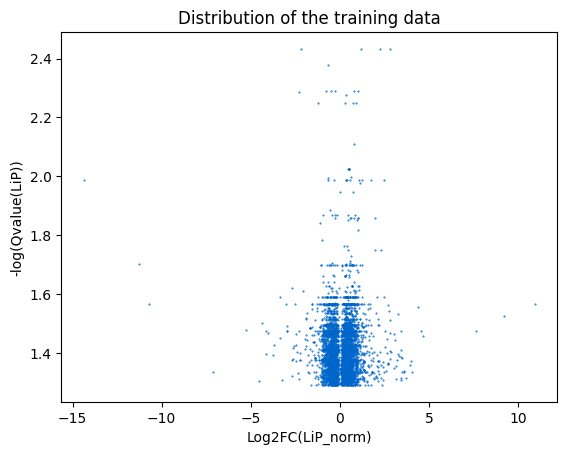

In [ ]:
pp.scatter(y=df['Qvalue(LiP)'].apply(lambda x:-np.log10(x)),x=df['Log2FC(LiP_norm)'],s=0.2, color='#06C')
pp.xlabel("Log2FC(LiP_norm)")
pp.ylabel("-log(Qvalue(LiP))")
pp.title('Distribution of the training data')


In [ ]:
proteins = df["Uniprot_ID"]
#pp.plot(proteins)
proteins.shape
protein_ids = Counter(proteins).keys() # equals to list(set(words))
len(protein_ids)

1490

In [ ]:
original_excel_2 = pd.read_excel('data/OsmoticStress.xlsx')

protein_ids = Counter(original_excel_2["Uniprot_ID"]).keys() # equals to list(set(words))
protein_frequency = Counter(proteins).values() # counts the elements' frequency
len(protein_ids)

2746

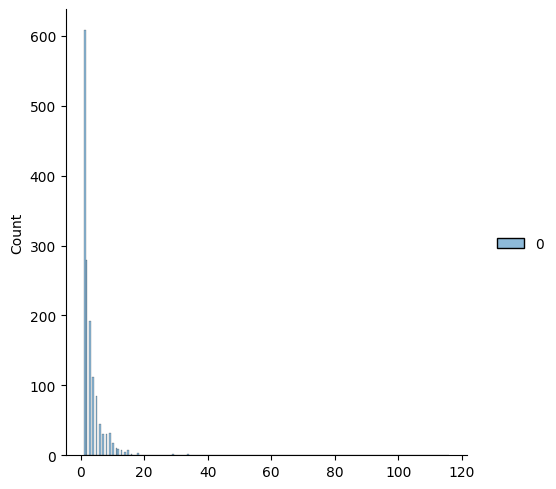

In [ ]:
sns.displot(data= protein_frequency)

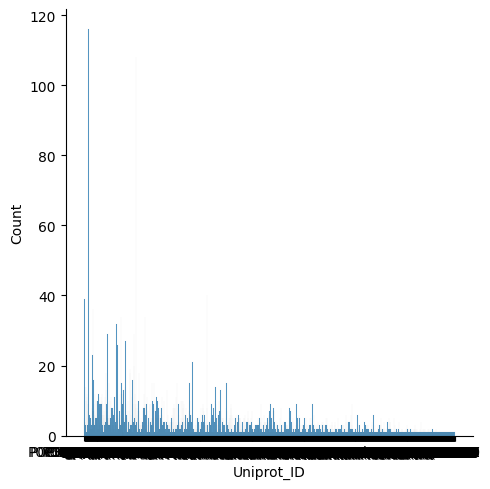

In [ ]:
sns.displot(proteins)

In [ ]:
scores = df["Log2FC(LiP_norm)"]
scores.shape

(5000,)

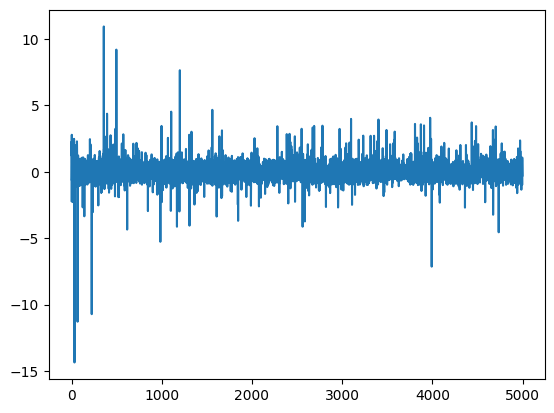

In [ ]:
pp.plot(scores)

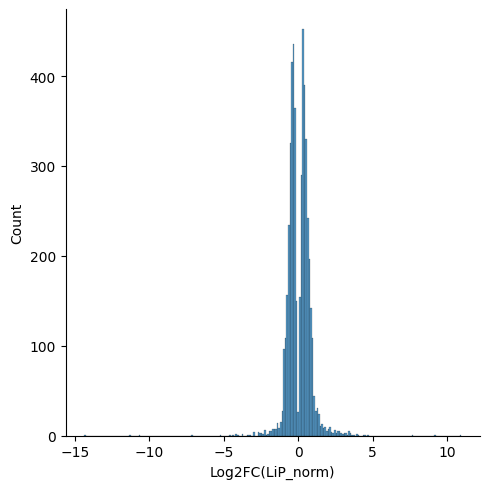

In [ ]:
sns.displot(df, x = "Log2FC(LiP_norm)")

In [ ]:
var_lip_scores = np.var(scores)
std_lip_scores = np.std(scores)
mean_lip_scores = np.mean(scores)
print("The variance of the Log2FC(LiP_norm)", var_lip_scores)
print("The standard deviation of the Log2FC(LiP_norm)", std_lip_scores)
print("The mean of the Log2FC(LiP_norm)", mean_lip_scores)

The variance of the Log2FC(LiP_norm) 0.6789418855449596
The standard deviation of the Log2FC(LiP_norm) 0.8239792992211392
The mean of the Log2FC(LiP_norm) 0.050456824953845125


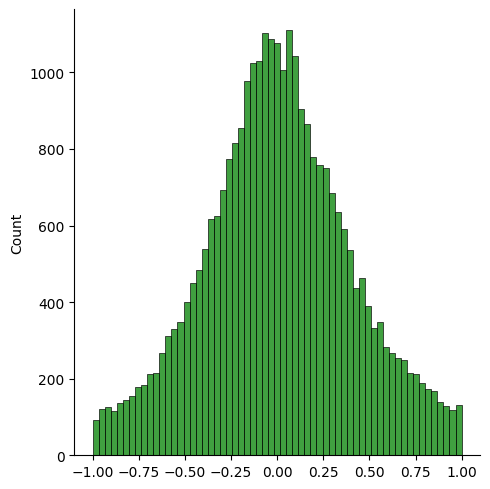

In [ ]:
close_zero = list(filter( lambda x : np.abs(x)<1 ,original_df["Log2FC(LiP_norm)"]))
sns.displot(close_zero, color='green')


In [ ]:
from scipy import stats
res = stats.normaltest(scores)
res

NormaltestResult(statistic=2295.4080154318654, pvalue=0.0)

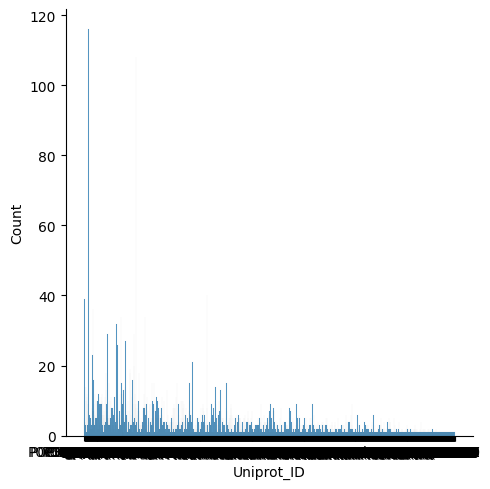

In [ ]:
sns.displot(df, x = "Uniprot_ID")